In [1]:
library(tidyverse)
library(ggplot2)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Load in datasets
weekly = read.csv('../Results/GAM_weekly.csv', header = T, stringsAsFactors = F)
biweekly = read.csv('../Results/GAM_biweekly.csv', header = T, stringsAsFactors = F)
monthly = read.csv('../Results/GAM_monthly.csv', header = T, stringsAsFactors = F)


In [3]:
cat("There are ", dim(weekly)[1], " rows in the weekly dataframe\n")
cat("There are ", dim(biweekly)[1], " rows in the biweekly dataframe\n")
cat("There are ", dim(monthly)[1], " rows in the monthly dataframe\n")

There are  161  rows in the weekly dataframe
There are  161  rows in the biweekly dataframe
There are  161  rows in the monthly dataframe


In [4]:
wk_0 = weekly %>% filter(z_inflation_pct > 90.0 | is.na(z_inflation_pct)) %>% nrow()
bwk_0 = biweekly %>% filter(z_inflation_pct > 90.0 | is.na(z_inflation_pct)) %>% nrow()
mnth_0 = monthly %>% filter(z_inflation_pct > 90.0 | is.na(z_inflation_pct)) %>% nrow()

cat("There are ", wk_0, " removeable rows in the weekly dataframe\n")
cat("There are ", bwk_0, " removeable rows in the biweekly dataframe\n")
cat("There are ", mnth_0, " removeable rows in the monthly dataframe\n")

There are  50  removeable rows in the weekly dataframe
There are  42  removeable rows in the biweekly dataframe
There are  32  removeable rows in the monthly dataframe


In [5]:
# Investigate where multivariate models have not converged

cat('\nWeekly\n')
print(summary(weekly$Multi_DevianceExplained))

cat('\nBiweekly\n')
print(summary(biweekly$Multi_DevianceExplained))

cat('\nMonthly\n')
print(summary(monthly$Multi_DevianceExplained))

cat("\n****************************\n NA Datasets \n")

cat('\nWeekly\n')
print(weekly[is.na(weekly$Multi_DevianceExplained), c("Species", "Location", "nr_bestfit_obs", "z_inflation_pct")])

cat('\nBiweekly\n')
print(biweekly[is.na(biweekly$Multi_DevianceExplained), c("Species", "Location", "nr_bestfit_obs", "z_inflation_pct")])

cat('\nMonthly\n')
print(monthly[is.na(monthly$Multi_DevianceExplained), c("Species", "Location", "nr_bestfit_obs", "z_inflation_pct")])

monthly %>% filter(Species == "Aedes.aegypti" & Location == "Saint_Johns")  %>% select(Species, temp_lag0, temp_lag1, temp_lag2, Best_Temp)


Weekly
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   18.45   31.45   30.23   41.75   75.30      51 

Biweekly
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   21.55   38.00   36.08   49.08   75.80      43 

Monthly
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   24.80   40.60   39.89   55.25   82.10      34 

****************************
 NA Datasets 

Weekly
                     Species    Location nr_bestfit_obs z_inflation_pct
21          Aedes.bahamensis     Manatee            179              99
22          Aedes.canadensis     Manatee            178              99
23             Aedes.dupreei     Manatee            179              99
26           Aedes.mathesoni     Manatee            179              99
28           Aedes.sticticus     Manatee            179              99
32       Anopheles.albimanus     Manatee            178              99
35      Anopheles.perplexens     Manatee            179              99
36 

Species,temp_lag0,temp_lag1,temp_lag2,Best_Temp
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Aedes.aegypti,8.989884,1.827478,14.99049,temp_lag1


I want to remove models from each temporal scale that did not converge at the multivariate level

In [6]:
remove = c(which(is.na(weekly$Multi_DevianceExplained)), which(is.na(biweekly$Multi_DevianceExplained)), which(is.na(monthly$Multi_DevianceExplained)))

weekly = weekly[-remove,]
biweekly = biweekly[-remove,]
monthly = monthly[-remove,]

str(monthly)

'data.frame':	110 obs. of  32 variables:
 $ Species                  : chr  "Aedes.aegypti" "Aedes.albopictus" "Aedes.infirmatus" "Aedes.sollicitans" ...
 $ temp_lag0                : num  180 125 730 436 1209 ...
 $ temp_lag1                : num  178 120 720 456 1255 ...
 $ temp_lag2                : num  156 158 738 439 1261 ...
 $ precip_lag0              : num  138 115 736 455 1264 ...
 $ precip_lag1              : num  152 147 738 455 1283 ...
 $ precip_lag2              : num  190 196 739 443 1271 ...
 $ nr_total_obs             : int  265846 265846 265846 265846 265846 265846 265846 265846 265846 265846 ...
 $ nr_bestfit_obs           : int  128 129 129 128 130 128 129 128 128 128 ...
 $ nr_nonzero_obs           : int  108 104 119 98 128 60 112 126 128 128 ...
 $ p                        : num  1.7 1.6 1.8 1.7 1.9 1.7 1.8 1.9 2 2 ...
 $ z_inflation_pct          : int  16 19 8 23 2 53 13 2 0 0 ...
 $ Best_Temp                : chr  "temp_lag2" "temp_lag1" "temp_lag1" "temp_lag0"

In [7]:
# Ensure every aggregation has the same number of datasets
cat("There are ", dim(weekly)[1], " rows in the weekly dataframe\n")
cat("There are ", dim(biweekly)[1], " rows in the biweekly dataframe\n")
cat("There are ", dim(monthly)[1], " rows in the monthly dataframe\n")

There are  110  rows in the weekly dataframe
There are  110  rows in the biweekly dataframe
There are  110  rows in the monthly dataframe


## Visualize Zero Inflation

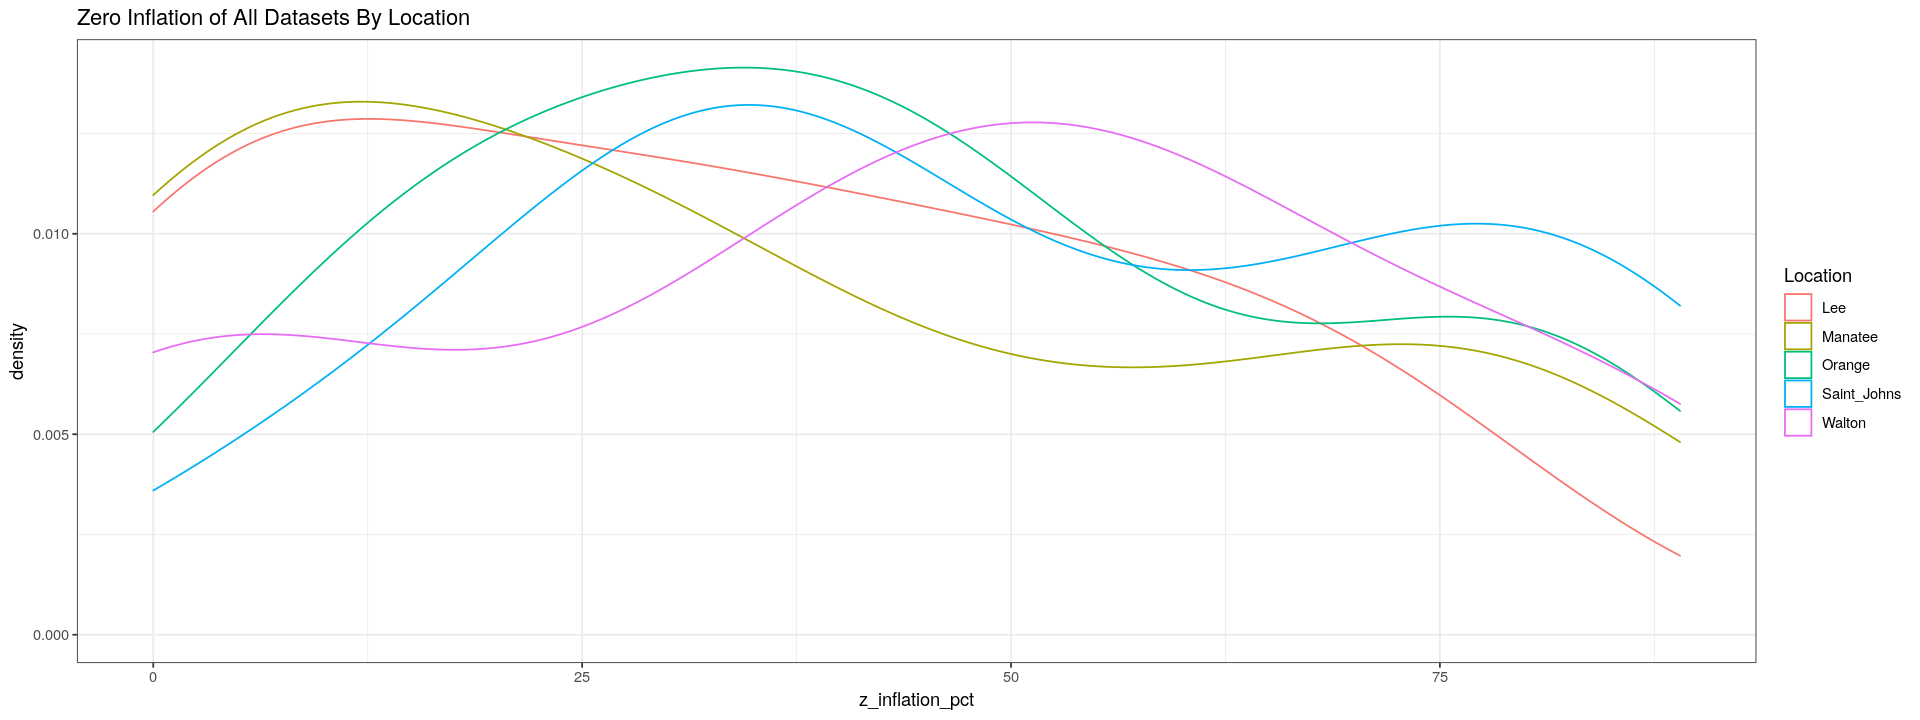

In [8]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(weekly, aes(x = z_inflation_pct, color = Location)) + geom_density(alpha = 0.3) + theme_bw() +
ggtitle("Zero Inflation of All Datasets By Location")


My highly zero inflated models are causing trouble- they have very low deviance explained (understandably!) and tend not to converge for my highest dimensional model (autoregressive multivariate). I do not believe that these models are informative for my analyis- such low abundance is more a sign of presence/absence than actual effect of temperature and precipitation.

Deviance explained of models with greater than 95% zero inflation:

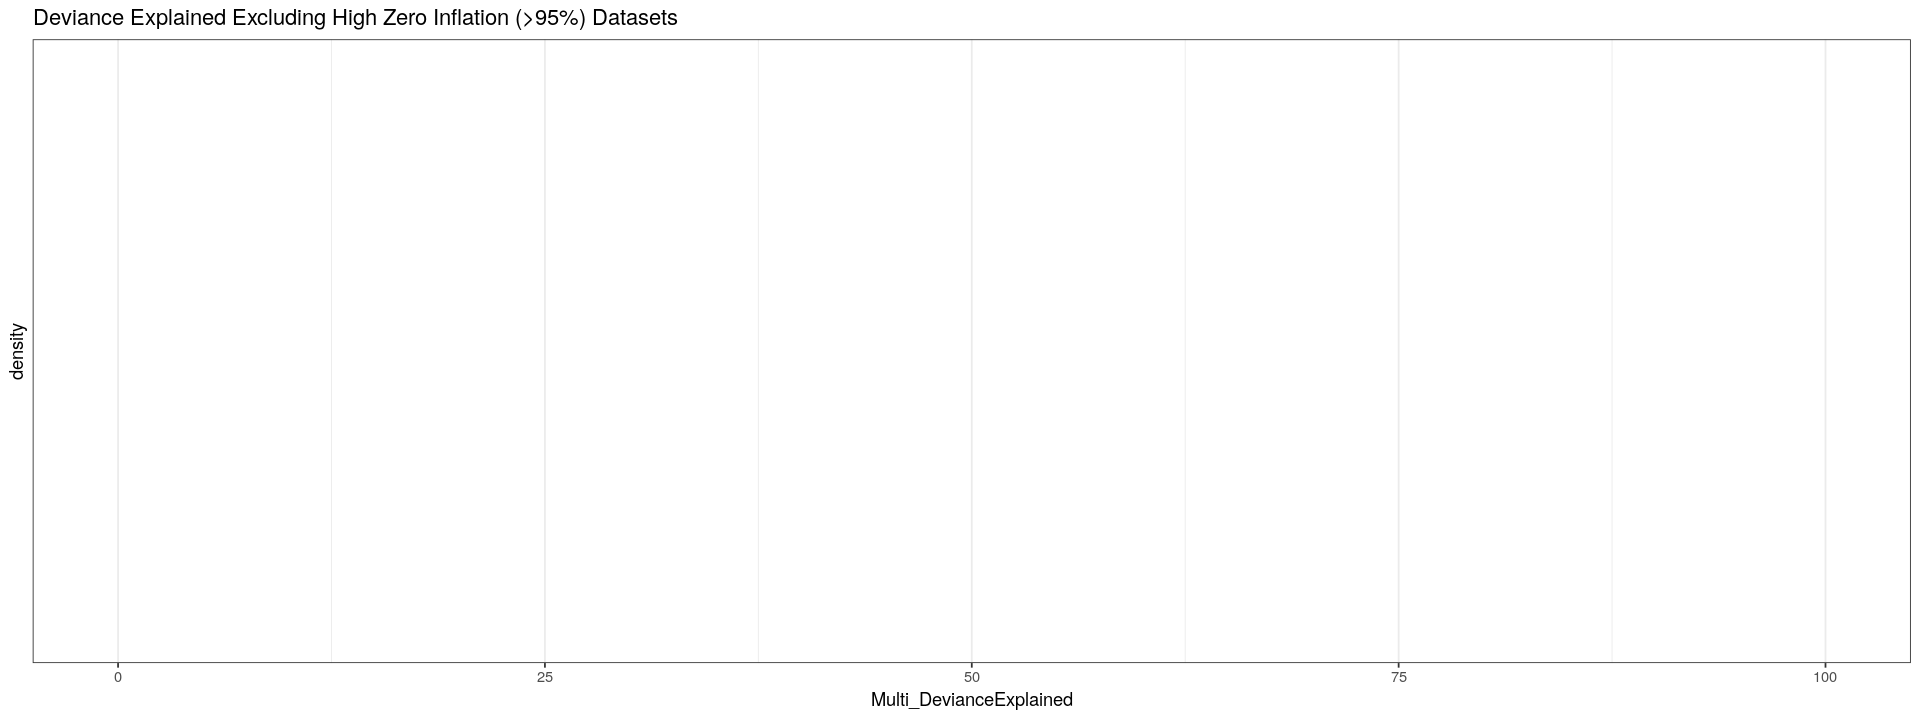

In [9]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(weekly[-which(weekly$z_inflation_pct > 95),], aes(x = Multi_DevianceExplained, color = Location)) + geom_density(alpha = 0.3) + 
theme_bw() + xlim(0,100) + ggtitle("Deviance Explained Excluding High Zero Inflation (>95%) Datasets")

I want to explore the number of non-zero observations in the best fit datasets by location

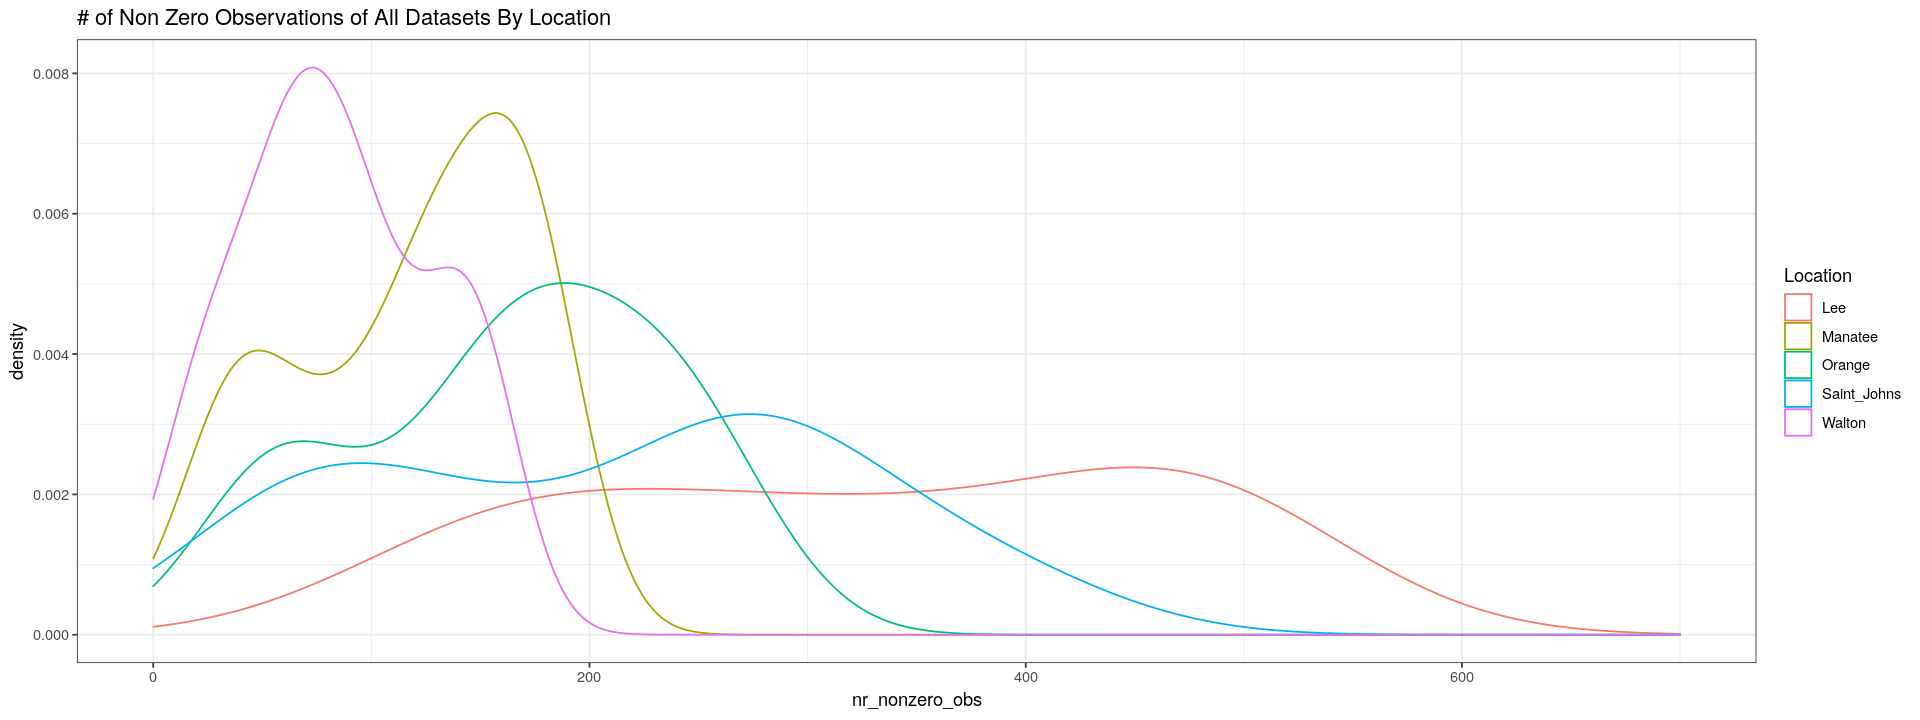

In [10]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(weekly, aes(x = nr_nonzero_obs, color = Location)) + geom_density(alpha = 0.3) + theme_bw() +
ggtitle("# of Non Zero Observations of All Datasets By Location") + xlim(0, 700)

I will remove datasets with over 90% zero inflation:

In [11]:
length(which(monthly$z_inflation_pct <= 89))

[1] 110

In [12]:
#remove = unique(c(which(weekly$z_inflation_pct >= 90), which(biweekly$z_inflation_pct >= 90), which(monthly$z_inflation_pct >= 90)))

#cat("\n Removing ", length(remove), " datasets from each aggregation \n")

#weekly = weekly[-remove,]
#biweekly = biweekly[-remove,]
#monthly = monthly[-remove,]

# Ensure every aggregation has the same number of datasets
#cat("\n There are ", dim(weekly)[1], " rows in the weekly dataframe\n")
#cat("\n There are ", dim(biweekly)[1], " rows in the biweekly dataframe\n")
#cat("\n There are ", dim(monthly)[1], " rows in the monthly dataframe\n")



## Table 1: Deviance explained

Build table comparing output of each temporal scale:

In [13]:
scales = list(weekly, biweekly, monthly)
names = c("weekly", "biweekly", "monthly")

cat("\nScale\tDeviance Explained\n------------------------------\n")
for(i in 1:length(scales)){
    if(names[i] == "weekly"){cat(names[i], "\t\t", median(scales[[i]]$Multi_DevianceExplained), "\n")}
    else{cat(names[i], "\t", median(scales[[i]]$Multi_DevianceExplained), "\n")}
}



Scale	Deviance Explained
------------------------------
weekly 		 31.45 
biweekly 	 38.65 
monthly 	 40.8 


Visualize the deviance explained in each location:

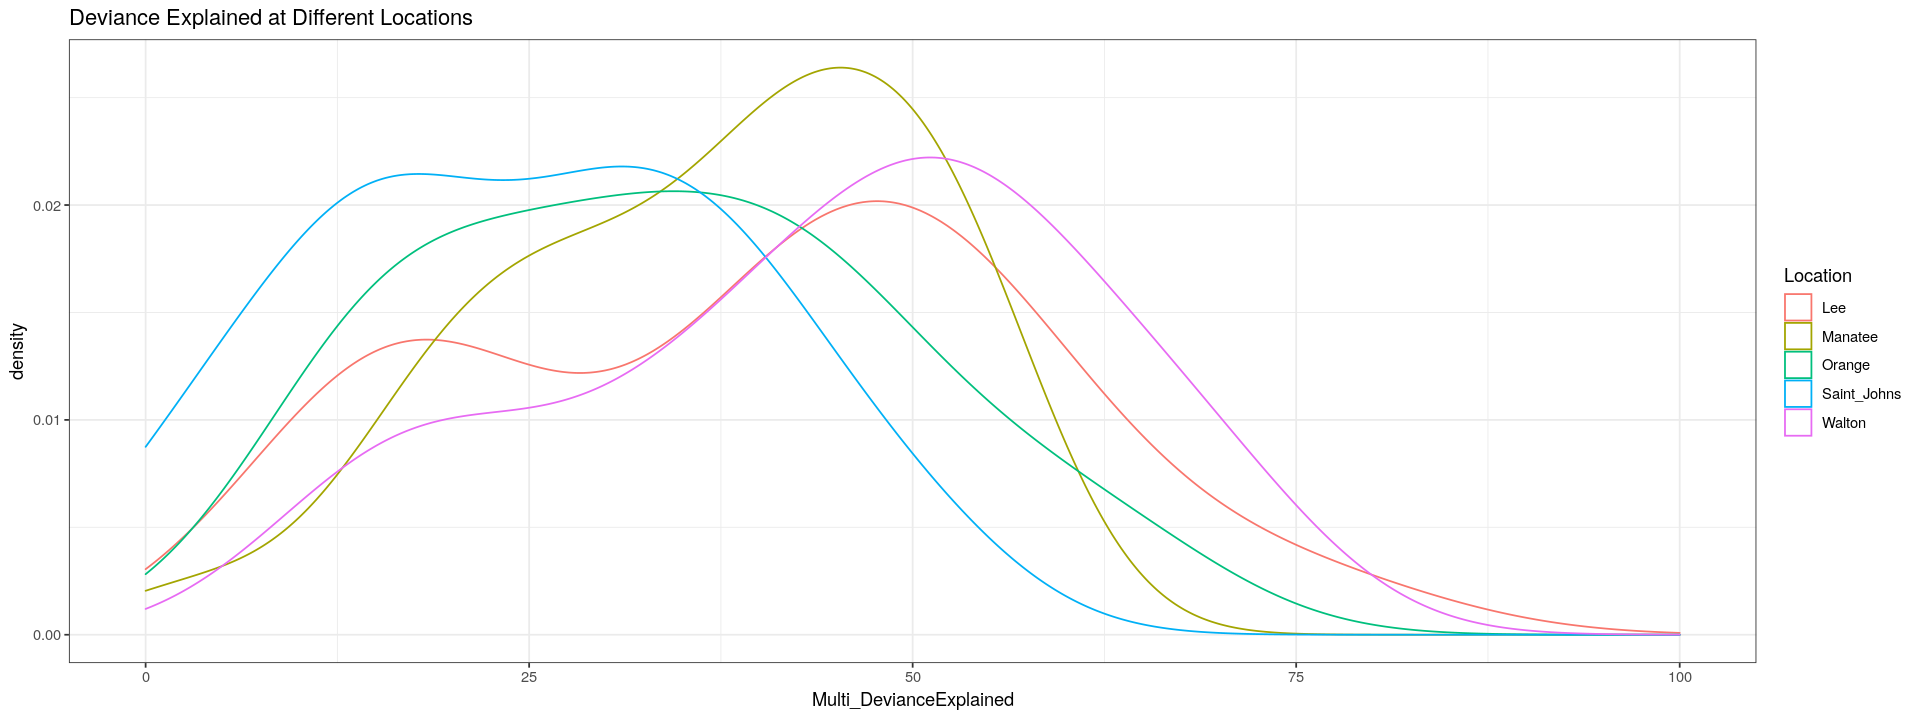

In [14]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(biweekly, aes(x = Multi_DevianceExplained, color = Location)) + geom_density(alpha = 0.3) + 
theme_bw() + xlim(0,100) + ggtitle("Deviance Explained at Different Locations")

Visualize the distribution of MAE at each location:

Warning message:
“Removed 16 rows containing non-finite values (stat_density).”


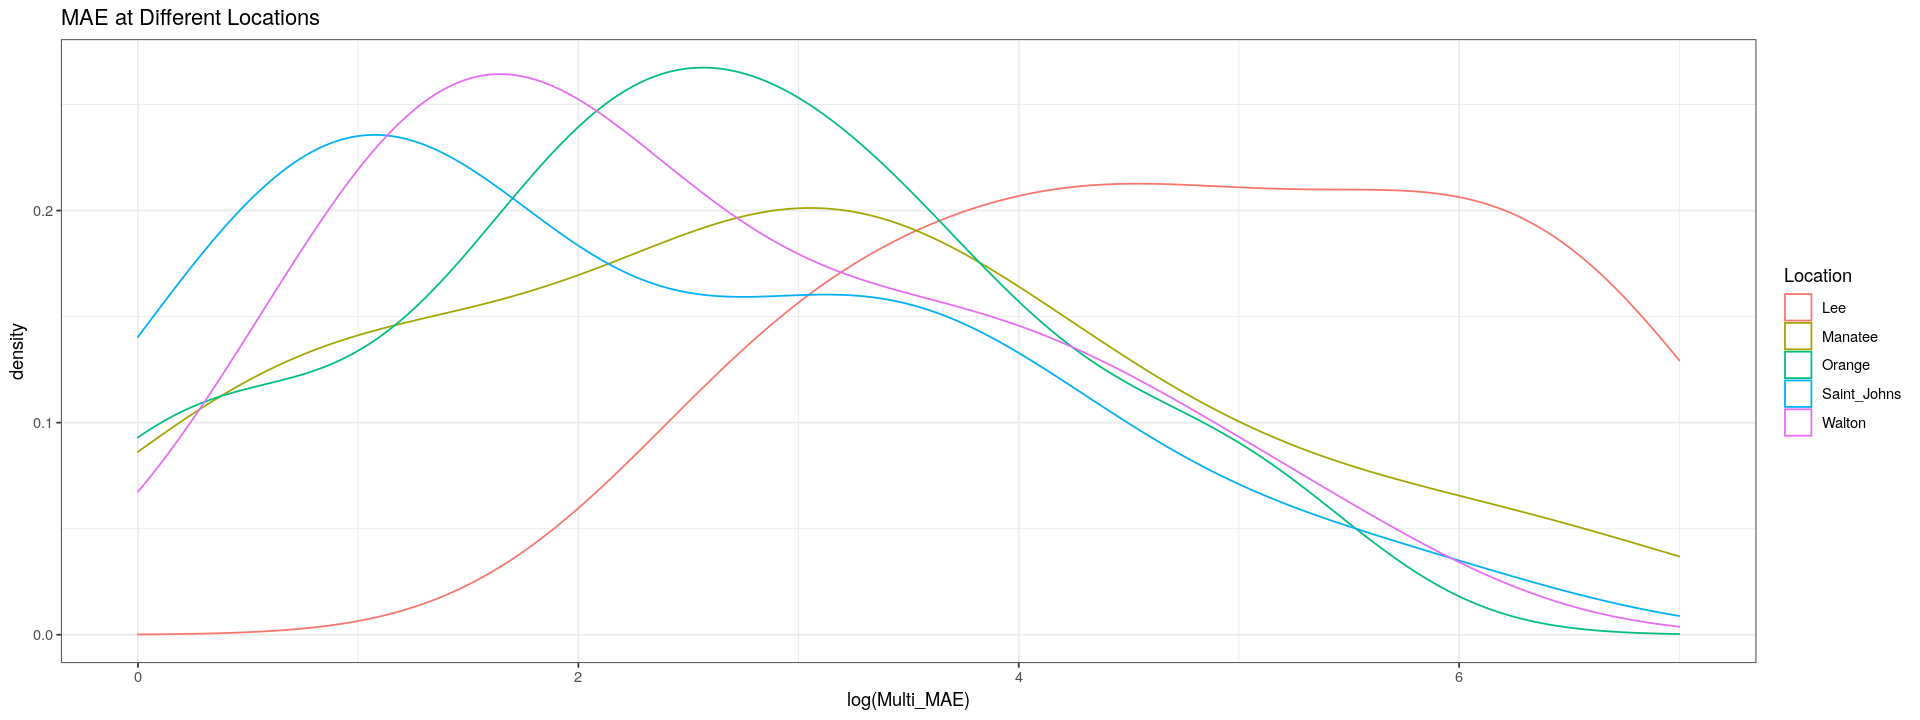

In [15]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(biweekly, aes(x = log(Multi_MAE), color = Location)) + geom_density(alpha = 0.3) + 
theme_bw() + ggtitle("MAE at Different Locations") + xlim(0,7)

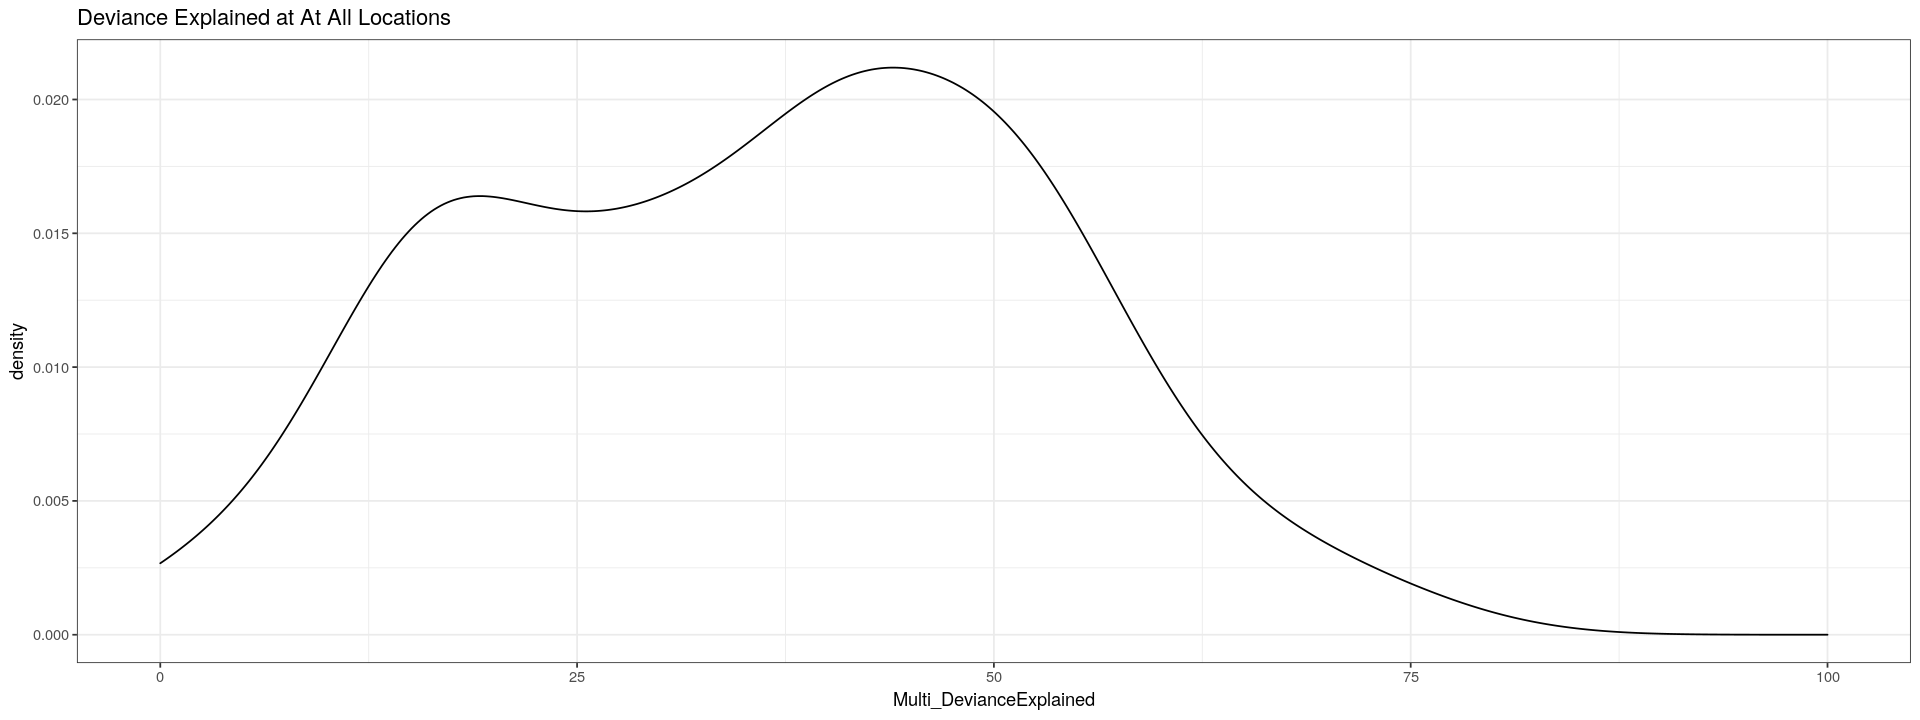

In [16]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(biweekly, aes(x = Multi_DevianceExplained)) + geom_density(alpha = 0.3) + 
theme_bw() + xlim(0,100) + ggtitle("Deviance Explained at At All Locations")

Create chart to population Table 1 in results: deviance explained at each location and temporal resolution

In [17]:
locations = sort(unique(weekly$Location))

table1 = matrix(NA, ncol = 4, nrow = 6)

for(j in 1:length(locations)){
    table1[j,1] = locations[j]
    table1[j,2] = median(weekly$Multi_DevianceExplained[which(weekly$Location == locations[j])])
    table1[j,3] = median(biweekly$Multi_DevianceExplained[which(biweekly$Location == locations[j])])
    table1[j,4] = median(monthly$Multi_DevianceExplained[which(monthly$Location == locations[j])])                      
}

table1[6,1] = "Total"
table1[6,2] = median(weekly$Multi_DevianceExplained)
table1[6,3] = median(biweekly$Multi_DevianceExplained)
table1[6,4] = median(monthly$Multi_DevianceExplained)


table1 = data.frame(table1)
colnames(table1) = c("Location", "Weekly", "Biweekly", "Monthly")

table2 = matrix(NA, ncol = 4, nrow = 6)

# Do the same table but for MAAPE
for(j in 1:length(locations)){
    table2[j,1] = locations[j]
    table2[j,2] = round(median(weekly$Multi_MAE[which(weekly$Location == locations[j])]),2)
    table2[j,3] = round(median(biweekly$Multi_MAE[which(biweekly$Location == locations[j])]),2)
    table2[j,4] = round(median(monthly$Multi_MAE[which(monthly$Location == locations[j])]),2) 
}

table2[6,1] = "Total"
table2[6,2] = round(median(weekly$Multi_MAE, na.rm = T),2)
table2[6,3] = round(median(biweekly$Multi_MAE, na.rm = T),2)
table2[6,4] = round(median(monthly$Multi_MAE, na.rm = T),2)


table2 = data.frame(table2)
colnames(table2) = c("Location", "Weekly", "Biweekly", "Monthly")


table3 = matrix(NA, ncol = 4, nrow = 6)

# Do the same table but for MAAPE
for(j in 1:length(locations)){
    table3[j,1] = locations[j]
    table3[j,2] = median(weekly$Multi_NMAE[which(weekly$Location == locations[j])])
    table3[j,3] = median(biweekly$Multi_NMAE[which(biweekly$Location == locations[j])])
    table3[j,4] = median(monthly$Multi_NMAE[which(monthly$Location == locations[j])])                      
}

table3[6,1] = "Total"
table3[6,2] = median(weekly$Multi_NMAE, na.rm = T)
table3[6,3] = median(biweekly$Multi_NMAE, na.rm = T)
table3[6,4] = median(monthly$Multi_NMAE, na.rm = T)


table3 = data.frame(table3)
colnames(table3) = c("Location", "Weekly", "Biweekly", "Monthly")

#print(table3)
print(table2)
print(table1)

     Location Weekly Biweekly Monthly
1         Lee 450.35   207.85   97.38
2     Manatee  40.44    18.25   10.31
3      Orange  32.09    12.51    5.89
4 Saint_Johns    7.5     3.46    1.74
5      Walton  12.07     5.59    2.18
6       Total  38.99    17.07    8.27
     Location Weekly Biweekly Monthly
1         Lee  35.25     42.3   45.85
2     Manatee   32.9     40.4    41.2
3      Orange  29.65     32.2    36.8
4 Saint_Johns   19.5     26.1    23.8
5      Walton  40.85     47.7   48.05
6       Total  31.45    38.65    40.8


Examine number of species in each location:

In [18]:
# Read in a clean version of the monthly dataset
weekly = read.csv('../Results/GAM_weekly.csv', header = T, stringsAsFactors = F)
biweekly = read.csv('../Results/GAM_biweekly.csv', header = T, stringsAsFactors = F)
monthly = read.csv('../Results/GAM_monthly.csv', header = T, stringsAsFactors = F)


# Remove rows with greater than 90% zero inflation:
monthly = monthly %>% filter(z_inflation_pct < 90)
weekly = weekly %>% filter(z_inflation_pct < 90)
biweekly = biweekly %>% filter(z_inflation_pct < 90)


cat("\nLocation\tSpecies\n------------------------------\n")
for(i in 1:length(locations)){
    if(locations[i] %in% c("Saint_Johns", "Manatee")){
        cat(locations[i], "\t", length(which(weekly$Location == locations[i])), "\n")
    }
    else{cat(locations[i], "\t\t", length(which(weekly$Location == locations[i])), "\n")}
}

cat("\n\n There are ", length(unique(weekly$Species)), " unique species overall")


Location	Species
------------------------------
Lee 		 18 
Manatee 	 31 
Orange 		 18 
Saint_Johns 	 21 
Walton 		 22 


 There are  35  unique species overall

In [19]:
compare_specs = which(monthly$Location == "Lee")

counts = data.frame(table(monthly$Species))
colnames(counts) = c("Species", "Counts")

counts = counts[which(counts$Counts > 1),]
cat(nrow(counts), " species with greater than 1 occurance")
table(counts$Counts)

29  species with greater than 1 occurance


 2  3  4  5 
 3  2 13 11 

In order to have some decent comparison, I want to restrict to species that occur in 4 or 5 of my sites. Let's see what these are:

In [20]:
keep_these = sort(counts$Species[which(counts$Counts >4)])
keep_these

[1] A.atlanticus.tormentor.morphological.group
 [2] Aedes.albopictus                          
 [3] Aedes.infirmatus                          
 [4] Aedes.triseriatus                         
 [5] Anopheles.quadrimaculatus                 
 [6] C.pipiens.morphological.group             
 [7] Culex.nigripalpus                         
 [8] Culiseta.melanura                         
 [9] Psorophora.ciliata                        
[10] Psorophora.columbiae                      
[11] Psorophora.ferox                          
38 Levels: A.atlanticus.tormentor.morphological.group ... Wyeomyia.vanduzeei

I have 3 major vector species in this group: Culex nigripalpus, Aedes albopictus, and Anopheles quadrimaculatus.

## Investigate Result 2: Generalizability

In [21]:
# Restrict species to those who have been generalized, as demonstrated by a non-NA reference column
#generalized = monthly[which(!is.na(monthly$Reference)), c("Species", "Location", "Multi_MAE","Multi_MB", "Reference", "Ref_MAE", "Ref_MB", "Ref_MAPE")]
#
# Only keep species that still have 4 or 5 occurances after cleaning
#generalized = generalized %>% filter(Species %in% keep_these)

#generalized$MAE_diff = round(generalized$Ref_MAE - generalized$Multi_MAE, 2)

# Where there's a self-comparison, mark as 999
#generalized$MAE_diff[which(generalized$Location == generalized$Reference)] = 999

#results1 = matrix(NA, nrow = length(unique(generalized$Species)), ncol = 5)

#for(i in 1:length(locations)){
#    for(j in 1:length(keep_these)){
        
#        index = which(generalized$Species == keep_these[j] & generalized$Location == locations[i])
        
#        if(length(index) > 0){
#            results1[j, i] = generalized$MAE_diff[which(generalized$Species == keep_these[j] & generalized$Location == locations[i])]
            
#        }
         
#    }
#}

#results1 = data.frame(keep_these, results1)
#colnames(results1) = c("Species", locations)

#results1


# Create table of significant lags across locations


In [22]:
monthly$sigtemp = str_detect(string = monthly$Multi_SignifVariables, "temp")
as.numeric(str_detect(string = monthly$Multi_SignifVariables, "precip"))

# Only keep species that still have 5 occurances after cleaning
manylocs = monthly %>% filter(Species %in% keep_these)

results = matrix(NA, nrow = length(unique(manylocs$Species)), ncol = 7)
results[,6:7] = 0

results[1,6] + as.numeric(str_detect(string = monthly$Multi_SignifVariables[1], "precip"))

[1]  1  1  1  1  0  1  1  0  1  1  0  1  1  1  1  1  1  1  0  0  1  0  0  0  1
 [26]  0  0  1  0  0  0  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  0  1  0
 [51]  0  0  1  0  1  0  1  0  1  1  1  1  0  1  0  0  1  1  1  1  1  0  1  1 NA
 [76]  1  0  1  1  0  1  0  0  1  0  0  1  0  0  1  1  1  1  0  1  1  0  0  1  1
[101]  0  0  1  0  0  0  1  1  1  0  1  0  1  0  1  1  1  1  0  0  0  1  0  0  0
[126]  1  0  1

[1] 1

In [23]:
monthly$sigtemp = str_detect(string = monthly$Multi_SignifVariables, "temp")
monthly$sigtemp = str_detect(string = monthly$Multi_SignifVariables, "precip")

# Only keep species that still have 4 or 5 occurances after cleaning
manylocs = monthly %>% filter(Species %in% keep_these)

results = matrix(NA, nrow = length(unique(manylocs$Species)), ncol = 7)
results[,6:7] = 0

for(i in 1:length(locations)){
    for(j in 1:length(keep_these)){
        
        index = which(manylocs$Species == keep_these[j] & manylocs$Location == locations[i])
        
        if(length(index) > 0){
            results[j, i] = manylocs$Multi_SignifVariables[which(manylocs$Species == keep_these[j] & manylocs$Location == locations[i])]
            
        }
         
    }
}

results = data.frame(keep_these, results, stringsAsFactors = F)
colnames(results) = c("Species", locations, "Total_Temperature", "Total_Precipitation")


for(i in 1:nrow(results)){
    results[i,7] = sum(as.numeric(str_detect(string = as.character(results[i,2:5]), "temp")), na.rm = T)
    results[i,8] = sum(as.numeric(str_detect(string = as.character(results[i,2:5]), "precip")), na.rm = T)
}

results

Species,Lee,Manatee,Orange,Saint_Johns,Walton,Total_Temperature,Total_Precipitation
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A.atlanticus.tormentor.morphological.group,"temp,precip",temp,"temp,precip",temp,"temp,precip",4,2
Aedes.albopictus,"temp,precip",temp,temp,"temp,precip","temp,precip",4,2
Aedes.infirmatus,"temp,precip",temp,temp,"temp,precip",temp,4,2
Aedes.triseriatus,"temp,precip","temp,precip","temp,precip",temp,"temp,precip",4,3
Anopheles.quadrimaculatus,"temp,precip",temp,temp,"temp,precip",,4,2
C.pipiens.morphological.group,"temp,precip","temp,precip","temp,precip",temp,temp,4,3
Culex.nigripalpus,"temp,precip","temp,precip","temp,precip","temp,precip","temp,precip",4,4
Culiseta.melanura,"temp,precip","temp,precip",precip,precip,temp,2,4
Psorophora.ciliata,"temp,precip","temp,precip","temp,precip","temp,precip",temp,4,4


In [24]:
#monthly %>% select(Species, Location, Multi_SignifVariables, Multi_DevianceExplained) %>% filter(str_length(Multi_SignifVariables) > 6)

table(weekly$Best_Precip)
table(biweekly$Best_Precip)
table(monthly$Best_Precip)


 precip_lag0  precip_lag1 precip_lag10 precip_lag11 precip_lag12  precip_lag2 
           8           11            5           13           12           15 
 precip_lag3  precip_lag4  precip_lag5  precip_lag6  precip_lag7  precip_lag8 
           9            9            9            8            5            3 
 precip_lag9 
           3 


precip_lag0 precip_lag1 precip_lag2 precip_lag3 precip_lag4 precip_lag5 
         30          35          17          11          11          14 


precip_lag0 precip_lag1 precip_lag2 
         42          52          34 

In [25]:
table(weekly$Best_Temp)
table(biweekly$Best_Temp)
table(monthly$Best_Temp)
colnames(monthly)


 temp_lag0  temp_lag1 temp_lag10 temp_lag11 temp_lag12  temp_lag2  temp_lag3 
        23          6          4         11          8         15          9 
 temp_lag4  temp_lag5  temp_lag6  temp_lag7  temp_lag8  temp_lag9 
        10          4          4          6          4          6 


temp_lag0 temp_lag1 temp_lag2 temp_lag3 temp_lag4 temp_lag5 
       35        26        19        12        12        14 


temp_lag0 temp_lag1 temp_lag2 
       56        45        27 

[1] "Species"                   "temp_lag0"                
 [3] "temp_lag1"                 "temp_lag2"                
 [5] "precip_lag0"               "precip_lag1"              
 [7] "precip_lag2"               "nr_total_obs"             
 [9] "nr_bestfit_obs"            "nr_nonzero_obs"           
[11] "p"                         "z_inflation_pct"          
[13] "Best_Temp"                 "AIC_wt_temp"              
[15] "Best_Precip"               "AIC_wt_precip"            
[17] "Multi_DevianceExplained"   "Multi_AIC"                
[19] "Ljung_Box"                 "Multi_MAE"                
[21] "Multi_NMAE"                "Multi_MB"                 
[23] "Multi_Blocks"              "Multi_SignifVariables"    
[25] "MultiAR_DevianceExplained" "MultiAR_AIC"              
[27] "MultiAR_MAE"               "MultiAR_NMAE"             
[29] "MultiAR_MB"                "MultiAR_Blocks"           
[31] "MultiAR_SignifVariables"   "Location"                 
[33] "sigtemp"

In [26]:
## Calculate Akaike weights

print(summary(weekly$AIC_wt_temp))
print(summary(weekly$AIC_wt_precip))

print(summary(biweekly$AIC_wt_temp))
print(summary(biweekly$AIC_wt_precip))

print(summary(monthly$AIC_wt_temp))
print(summary(monthly$AIC_wt_precip))

cat("\nAverage median temperature lag confidence = ", mean(c(median(monthly$AIC_wt_temp), 
                                                      median(biweekly$AIC_wt_temp),
                                                     median(weekly$AIC_wt_temp))))

cat("\nAverage median precipitation lag confidence = ", mean(c(median(monthly$AIC_wt_precip), 
                                                      median(biweekly$AIC_wt_precip),
                                                     median(weekly$AIC_wt_precip))))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.30   68.97   89.35   80.07   99.00  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.90   53.83   82.40   75.00   99.35  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.30   65.72   87.75   79.71   98.62  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24.20   67.15   83.40   79.96   98.17  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.90   70.30   93.60   84.12   99.62  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.80   64.00   88.70   80.53   99.20  100.00 

Average median temperature lag confidence =  90.23333
Average median precipitation lag confidence =  84.83333

In [27]:
# Find out how many models successfully converged on both multivariate models
success = monthly %>% filter(!is.na(Multi_AIC) & !is.na(MultiAR_AIC))
cat("\n", nrow(success), " out of ", nrow(monthly), " monthly datasets successfully converged in both AR and non-AR multivariate models")

cat("\n", "The highest deviance explained was ", max(monthly$MultiAR_DevianceExplained - monthly$Multi_DevianceExplained, na.rm = T))

# Find out how many datasets were significantly worse, the same, or better with the AR term incorporated
counts = success %>% mutate(AIC_diff = Multi_AIC - MultiAR_AIC) %>% count(AIC_diff > 2, AIC_diff < -2) 

counts
#counts = counts %>% add_column(Result = c("Equal", "Worse", "Better"))

#ggplot(counts, aes(x = Result, y = n)) + geom_bar(stat = "identity")


 0  out of  128  monthly datasets successfully converged in both AR and non-AR multivariate models

Warning message in max(monthly$MultiAR_DevianceExplained - monthly$Multi_DevianceExplained, :
“no non-missing arguments to max; returning -Inf”



 The highest deviance explained was  -Inf

AIC_diff > 2,AIC_diff < -2,n
<lgl>,<lgl>,<int>


In [28]:
# Find out how many models successfully converged on both multivariate models
success = weekly %>% filter(!is.na(Multi_AIC) & !is.na(MultiAR_AIC))
cat("\n", nrow(success), " out of ", nrow(weekly), " weekly datasets successfully converged in both AR and non-AR multivariate models")

cat("\n", "The highest deviance explained was ", max(weekly$MultiAR_DevianceExplained - weekly$Multi_DevianceExplained, na.rm = TRUE))

# Find out how many datasets were significantly worse, the same, or better with the AR term incorporated
counts = success %>% mutate(AIC_diff = Multi_AIC - MultiAR_AIC) %>% count(AIC_diff > 2, AIC_diff < -2) 

counts
#counts = counts %>% add_column(Result = c("Equal", "Worse", "Better"))

#ggplot(counts, aes(x = Result, y = n)) + geom_bar(stat = "identity")


 0  out of  110  weekly datasets successfully converged in both AR and non-AR multivariate models

Warning message in max(weekly$MultiAR_DevianceExplained - weekly$Multi_DevianceExplained, :
“no non-missing arguments to max; returning -Inf”



 The highest deviance explained was  -Inf

AIC_diff > 2,AIC_diff < -2,n
<lgl>,<lgl>,<int>


In [29]:
# Find the overall MB of models

over = sum(monthly$Multi_MB >0, na.rm = T)
under = sum(monthly$Multi_MB <0, na.rm = T)
zero = sum(monthly$Multi_MB == 0, na.rm = T)

cat("Of ", nrow(monthly), " monthly datasets, ", over, " were overestimated, ", under,
    " were underestimated, ", zero, " were right on the money, and ", 
    sum(is.na(monthly$Multi_MB)), " did not converge")

monthly[which(monthly$Multi_MB == 0),]

Of  128  monthly datasets,  49  were overestimated,  69  were underestimated,  9  were right on the money, and  1  did not converge

,Species,temp_lag0,temp_lag1,temp_lag2,precip_lag0,precip_lag1,precip_lag2,nr_total_obs,nr_bestfit_obs,nr_nonzero_obs,⋯,Multi_SignifVariables,MultiAR_DevianceExplained,MultiAR_AIC,MultiAR_MAE,MultiAR_NMAE,MultiAR_MB,MultiAR_Blocks,MultiAR_SignifVariables,Location,sigtemp
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>
53,Aedes.fulvus,23.147653,27.5286752,26.969080,23.31193,26.557065,22.701844,145114,68,9,⋯,"temp,precip",NA,NA,NA,NA,NA,NA,NA,Orange,TRUE
63,Culex.pilosus,43.963451,46.0689530,45.658176,43.65960,43.272386,45.913650,145114,69,8,⋯,,NA,NA,NA,NA,NA,NA,NA,Orange,FALSE
77,Aedes.canadensis.complex,80.990078,79.0146308,76.659304,78.30792,80.480461,77.047464,313674,114,14,⋯,,NA,NA,NA,NA,NA,NA,NA,Saint_Johns,FALSE
78,Aedes.fulvus,10.516445,10.9359914,11.462483,9.41959,11.330502,10.285271,313674,114,26,⋯,precip,NA,NA,NA,NA,NA,NA,NA,Saint_Johns,TRUE
80,Aedes.mitchellae,15.621019,15.0243515,15.306224,13.38882,15.077633,17.045885,313674,114,29,⋯,,NA,NA,NA,NA,NA,NA,NA,Saint_Johns,FALSE
83,Aedes.triseriatus,-37.073978,-26.9022384,-23.395820,-31.95911,-24.297764,-28.206618,313674,114,25,⋯,temp,NA,NA,NA,NA,NA,NA,NA,Saint_Johns,FALSE
116,Culex.tarsalis,3.897482,-0.1462504,-2.117114,16.41312,2.459530,-2.964497,96784,38,6,⋯,precip,NA,NA,NA,NA,NA,NA,NA,Walton,TRUE
121,Psorophora.ciliata,-1.626840,2.4178468,6.877689,8.91011,6.310428,6.459337,96784,39,13,⋯,temp,NA,NA,NA,NA,NA,NA,NA,Walton,FALSE
124,Psorophora.howardii,14.231608,17.3661589,16.252434,14.92734,16.842640,13.430586,96784,38,4,⋯,,NA,NA,NA,NA,NA,NA,NA,Walton,FALSE


In [30]:
# Find temperature ranges

ranges = vector("list", 5)
names(ranges) = locations

for(i in 1:length(locations)){
    weekly_ts = read.csv(paste0("../Data/Extracted_Data/Aggregated/", locations[i], "_weekly.csv"), header = T, stringsAsFactors = F)
    ranges[[i]] = c(range(weekly_ts$temp_mean), diff(range(weekly_ts$temp_mean)))
}

print(ranges)

$Lee
[1] 14.28816 34.91221 20.62405

$Manatee
[1] 18.38263 34.37219 15.98956

$Orange
[1] 17.98406 35.32719 17.34313

$Saint_Johns
[1]  8.466605 35.805016 27.338412

$Walton
[1] 11.48445 35.57372 24.08926

